<div style="display: inline-block;">
    <img src="images/nhsa_logo.png" alt="Image" style="text-align: left;">
</div>

# Parent Gauge Data Analysis Project
---
## Final Data Analysis

Final Data Analysis

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from rich.console import Console
from rich.table import Table

In [16]:
#read the .csv file into dataframe
df = pd.read_csv('../data/intv_data.csv')

/var/folders/vw/1sthm_ts1dj_1hqg1xnsz19w0000gn/T/ipykernel_7477/832574344.py:2: DtypeWarning: Columns (91) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/intv_data.csv')


### Compare 1st year of using Parent Gauge results to subsequent years to identify if there is an average increase in rankings after Parent Gauge adoption.- Break up interview data results by program age on PG and trend results over time to identify if program results show increases in parent/program scores after the first year, if there is a certain age in PG where programs show the most improvement.- Compare all programs with 4-5 years of PG experience, break out each year by age on PG, track standard increase in overall PG scores to identify if there is a trend in what year the largest increase from first year occurs, confirm if average scores go up after the first year.- Ideal results would tell us if and when users PG PFCE scores increase on average after a specific amount of time of use. For example, PG users show an increase of __% in overall results by the second year of use and by year three show an average of __% improvement in PG scores.

- https://bookdown.org/Rmadillo/likert/always-visualize.html#:~:text=Histograms%20of%20the%20actual%20score,understand%20the%20results%20very%20quickly.

In [1]:
#for first bullet, do scatterplot, and quadratic linear regression on likert sum and PG age by months/year


#second bullet is probably  quadratic too
# with df, get 'program_age_at_interview' and get 'likert_sum_mid_post' and do a scatterplot

In [76]:
# Get the names of programs that have reached an age of 5 at least once
programs_with_age_5 = df[df['program_age_at_interview'] == 5]['program'].unique()

# Filter your DataFrame for these programs
filtered_df = df[df['program'].isin(programs_with_age_5)]
filtered_df = filtered_df[filtered_df['survey_completion_rate'] >= 0.93]

filtered_df['likert_sum_score_difference'] = df['likert_sum_mid_post'] - df['likert_sum_mid_post_initial']

grouped_df = filtered_df.groupby(['program', 'program_age_at_interview'])['likert_sum_mid_post'].mean().reset_index()
grouped_df = grouped_df.rename(columns={'likert_sum_mid_post': 'average_likert_score'})

grouped_df['likert_sum_change'] = grouped_df['average_likert_score'].diff()

grouped_df.head(5)

,program,program_age_at_interview,average_likert_score,likert_sum_change
0,alta head start,1.0,156.042705,NaN
1,alta head start,2.0,159.697947,3.655243
2,alta head start,3.0,158.000000,-1.697947
3,alta head start,4.0,159.130233,1.130233
4,alta head start,5.0,152.793893,-6.336339


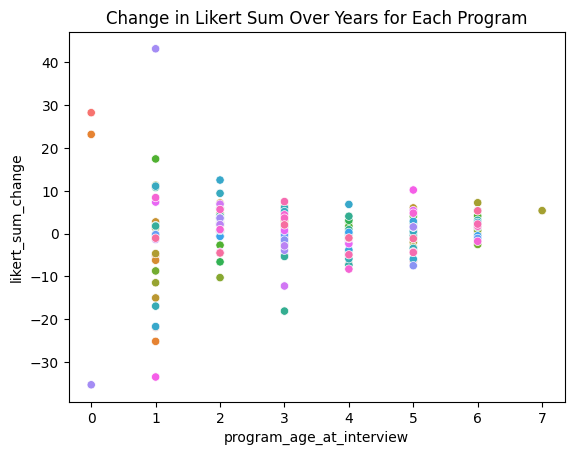

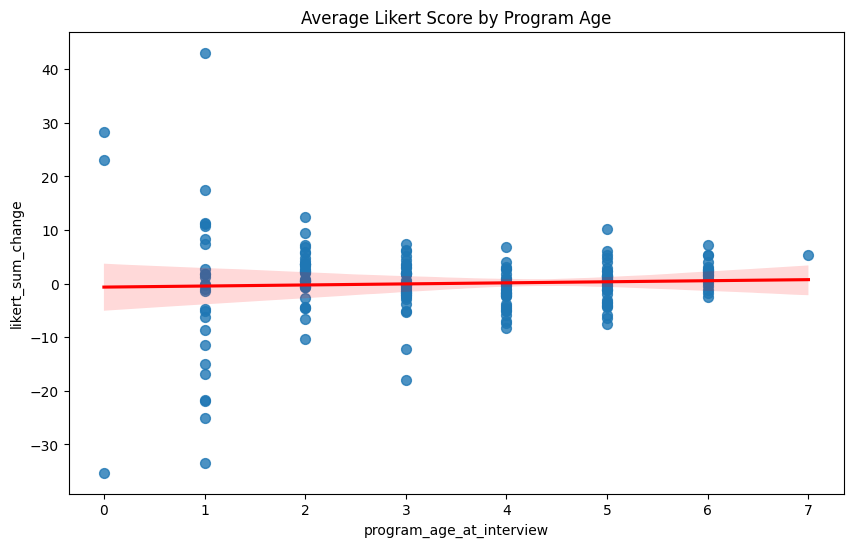

In [77]:
sns.scatterplot(x='program_age_at_interview', y='likert_sum_change', hue='program', data=grouped_df, marker='o', legend=False)
plt.title('Change in Likert Sum Over Years for Each Program')
plt.show()

plt.figure(figsize=(10, 6))
sns.regplot(x='program_age_at_interview', y='likert_sum_change', data=grouped_df, scatter_kws={'s':50}, line_kws={"color": "red"})
plt.title('Average Likert Score by Program Age')
plt.show()

## Identify most popular months/seasons of interview use
- Compare interview counts by month to identify rankings of most interviews done by month
- Ideal results would tell us exactly which months are most popular for conducting interviews in general
- Would also love to see this broken out by Initial/Mid/Post to get multiple ranked lists of most interviews done by month by Initial/Mid/Post

In [7]:
# Calculate interview counts by month
month_counts = df['date_month'].value_counts().sort_index()

# Determine the rankings of months with most interviews
rankings = month_counts.rank(ascending=False)

# Calculate the percentage of each month's count out of the total count
total_count = month_counts.sum()
percentages = (month_counts / total_count) * 100

# Create a DataFrame to display the rankings and percentages
rankings_df = pd.DataFrame({'Month': month_counts.index, 'Interview Count': month_counts.values, 'Rank': rankings.values, 'Percentage': percentages.values})
rankings_df = rankings_df.sort_values('Rank')

In [9]:
# Create a new rich Table
table = Table(title="Interview Counts by Month")
table.add_column("Rank", style="cyan")
table.add_column("Month", style="magenta")
table.add_column("Interview Count", style="green")
table.add_column("Percentage", style="red")

# Iterate over the rows of the DataFrame and add them to the table
for index, row in rankings_df.iterrows():
    rank = int(row['Rank'])
    month = calendar.month_name[int(row['Month'])]
    count = int(row['Interview Count'])
    percentage = "{:.2f}%".format(row['Percentage'])
    table.add_row(str(rank), month, str(count), percentage)

# Create a console object and print the table
console = Console()
console.print(table)

             Interview Counts by Month             
┏━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Rank ┃ Month     ┃ Interview Count ┃ Percentage ┃
┡━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ 1    │ May       │ 29217           │ 15.86%     │
│ 2    │ November  │ 26914           │ 14.61%     │
│ 3    │ April     │ 25579           │ 13.89%     │
│ 4    │ October   │ 19911           │ 10.81%     │
│ 5    │ February  │ 16687           │ 9.06%      │
│ 6    │ January   │ 16677           │ 9.05%      │
│ 7    │ March     │ 14086           │ 7.65%      │
│ 8    │ December  │ 13006           │ 7.06%      │
│ 9    │ June      │ 9430            │ 5.12%      │
│ 10   │ September │ 7575            │ 4.11%      │
│ 11   │ July      │ 3183            │ 1.73%      │
│ 12   │ August    │ 1923            │ 1.04%      │
└──────┴───────────┴─────────────────┴────────────┘

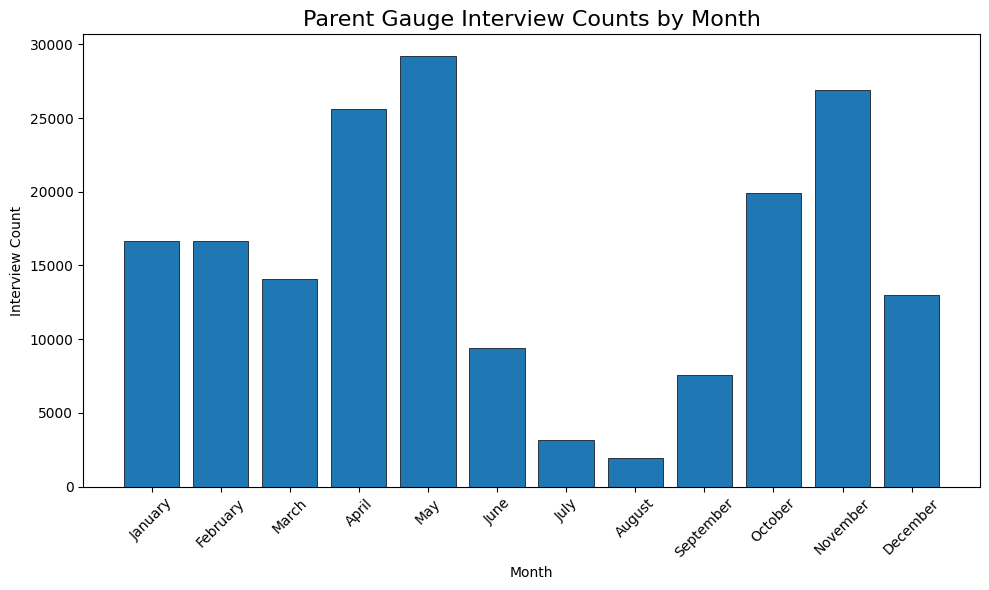

In [14]:
##BAR GRAPH##
# Assuming 'rankings_df' is the DataFrame containing the rankings
rankings_df = rankings_df.sort_values('Month')  # Sort the DataFrame by month

month_labels = rankings_df['Month'].astype(int)  # Convert month numbers to integers
interview_counts = rankings_df['Interview Count']

# Get the month names corresponding to the month numbers
month_names = [calendar.month_name[month_num] for month_num in month_labels]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(month_names, interview_counts, edgecolor='black', linewidth=0.5)

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Interview Count')
plt.title('Parent Gauge Interview Counts by Month', fontsize='16')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Display the chart
plt.tight_layout()
plt.show()

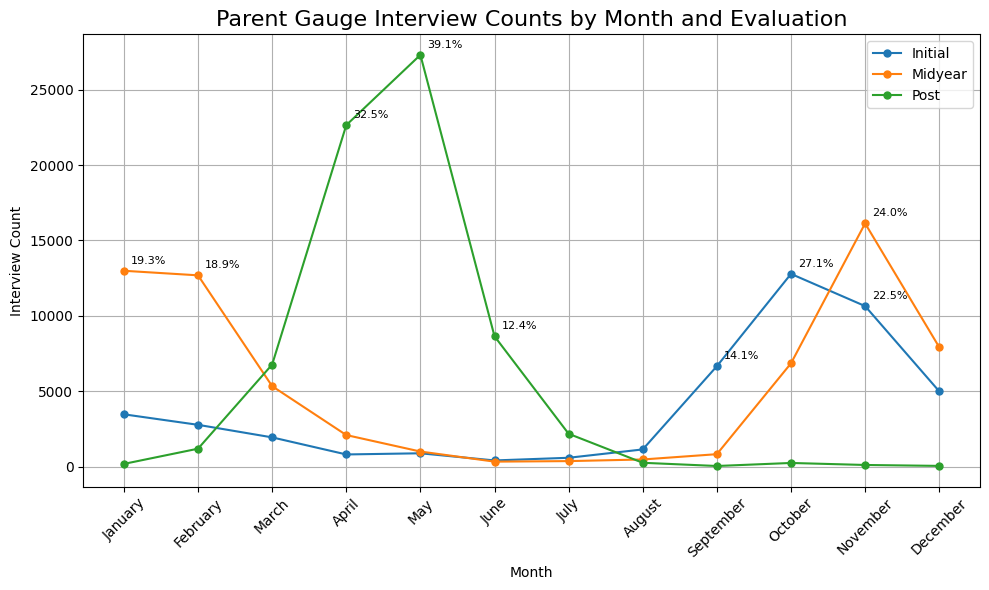

In [13]:
# Filter the DataFrame to include only desired evaluation categories
desired_categories = ['Initial', 'Midyear', 'Post']
filtered_df = df[df['evaluation'].isin(desired_categories)]

# Extract the month from the interview date
filtered_df['date_month'] = filtered_df['date_month'].astype(int)  # Convert month values to integers

# Calculate interview counts by month and evaluation category
month_evaluation_counts = filtered_df.groupby(['date_month', 'evaluation']).size().unstack().fillna(0)

# Calculate the percentage of each category out of the total count for that category
category_totals = month_evaluation_counts.sum()
month_evaluation_percentages = month_evaluation_counts.div(category_totals) * 100

# Plotting the line chart
plt.figure(figsize=(10, 6))

for category in month_evaluation_counts.columns:
    plt.plot(month_evaluation_counts.index, month_evaluation_counts[category], marker='o', markersize=5, label=category)

    # Calculate the percentage for the top three categories in each month
    top_three_percentage = month_evaluation_percentages[category].nlargest(3)

    # Annotate the percentage values on the plot
    for month, percentage in top_three_percentage.items():
        plt.annotate(f'{percentage:.1f}%', xy=(month, month_evaluation_counts[category][month]),
                     xytext=(5, 5), textcoords='offset points', fontsize=8)

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Interview Count')
plt.title('Parent Gauge Interview Counts by Month and Evaluation', fontsize='16')
plt.legend()

# Customize x-axis tick labels with month names
month_labels = [calendar.month_name[month_num] for month_num in month_evaluation_counts.index]
plt.xticks(month_evaluation_counts.index, month_labels, rotation=45)

# Add gridlines
plt.grid(True)

# Display the chart
plt.tight_layout()
plt.show()


## Looking at full data set, national averages for each question - Identify potential national low levels, increase levels
- Overall average scores for each question on PG interview
- Identify highest and lowest ranked questions and areas within PG
- Ideal results would help us show national trends of challenges/excellence based on PG questions (both program/parent scores)

In [97]:
# For bullet 1: Overall average scores for each question on PG interview
# Filter columns starting with 'Q'
q_columns = [col for col in df.columns if col.startswith('Q')]

# Calculate average for each variable
averages = df[q_columns].mean().reset_index().round(2)

# Rename the columns
averages.columns = ['Variable', 'Average']

# Sort by descending average
averages_sorted = averages.sort_values('Average', ascending=False)

# Display the table
print(averages_sorted)

# For bullet 2: see likert_analysis.ipynb, use likert heatmap, which utilizes the 'likert' package in R code 
#https://github.com/jbryer/likert

   Variable  Average
25      Q20     4.88
19      Q19     4.87
11      Q15     4.86
26      Q21     4.77
15      Q17     4.72
2      Q10a     4.71
23      Q1d     4.71
0        Q1     4.68
13      Q16     4.67
32       Q3     4.67
21      Q1b     4.65
1       Q10     4.64
4      Q11a     4.64
17      Q18     4.62
30      Q25     4.61
5       Q12     4.60
48      QD2     4.60
33      Q3a     4.59
14     Q16a     4.57
27      Q22     4.57
42       Q8     4.57
12     Q15a     4.55
9       Q14     4.55
46      QD1     4.54
49     QD2a     4.54
16     Q17a     4.53
3       Q11     4.52
45      Q9a     4.49
6      Q12a     4.49
36       Q5     4.44
22      Q1c     4.42
24       Q2     4.42
47     QD1a     4.42
40       Q7     4.40
37      Q5a     4.37
41      Q7a     4.32
20      Q1a     4.31
31      Q2a     4.29
38       Q6     4.29
43      Q8a     4.29
34       Q4     4.26
39      Q6a     4.24
44       Q9     4.22
18     Q18a     4.18
10     Q14a     4.09
8      Q13a     4.05
29      Q24  

In [108]:
#For bullet 2
# Filter columns starting with 'Q'
q_columns = [col for col in df.columns if col.startswith('Q')]

# Group by 'program' and calculate the mean for each column
grouped_means = df.groupby('program')[q_columns].mean().reset_index()

#now get the average of each question across programs
q_avg_across_programs = grouped_means[q_columns].mean()
q_avg_across_programs = q_avg_across_programs.sort_values(ascending=False)

print(q_avg_across_programs)


Q19     4.889543
Q20     4.886029
Q15     4.880244
Q21     4.765314
Q1d     4.736269
Q17     4.731217
Q10a    4.720800
Q1      4.696335
Q3      4.668110
Q1b     4.654058
Q25     4.653608
Q10     4.652518
Q16     4.650260
Q11a    4.618111
Q3a     4.612311
QD2     4.608366
Q18     4.606328
Q12     4.596623
QD2a    4.585842
Q22     4.560274
Q8      4.552273
Q9a     4.541640
Q14     4.536696
Q17a    4.520136
Q16a    4.502766
QD1     4.494178
Q11     4.490521
Q12a    4.486368
Q15a    4.456009
Q7      4.426206
Q1c     4.421025
Q5      4.412224
QD1a    4.408218
Q2      4.402378
Q5a     4.400517
Q7a     4.367472
Q8a     4.311643
Q1a     4.284011
Q9      4.233995
Q2a     4.228352
Q6a     4.227749
Q6      4.192478
Q4      4.189007
Q18a    4.160305
Q13a    4.110944
Q24     4.102978
Q14a    4.086167
Q23     3.845922
Q4a     3.700438
Q13     3.596228
dtype: float64


https://www.st-andrews.ac.uk/media/ceed/students/mathssupport/Likert.pdf
With Likert scale data we cannot use the mean as a measure of central tendency as it has no meaning i.e. what is the average of Stronly agree and disagree? The most appropriate measure of is the mode the most frequent responses, or the median. The best way to display the distribution of responses i.e. (% that agree, disagree etc) is to use a bar chart.

## Are seasoned Parent Gauge users showing higher averages in these areas?
- When breaking up PG users by age - are seasoned users consistently ranking higher in overall PG scores? Are there certain areas/questions where seasoned users are seeing higher responses?

In [1]:
##use quadratic regression to determine the peak in PG performance.

#program, program_total_years_participated, likert_sum

### Identify how many years to be considered a seasoned user if there is an increase in scores over time.
- When comparing PG users by age, is there an age where increases in scores level out?
- Ideal results would identify if there is an age we could say a program is seasoned and resulting changes in scores would not be from adopting PG

In [2]:
##use quadratic regression to determine the peak in PG performance.

### Any differences in overall averages when comparing programs by how many interview seasons occur?
- Breaking out interviews by season in which they occurred (Initial/Mid/Post) is there a likelihood in certain seasons having a marked difference in overall parent average scores (no program scores as Initial does not include)
- Is there a difference when comparing programs who conduct one interview season, two interview seasons, or three? Do any of them show a marked difference in overall parent scores

### Any differences in overall averages when comparing programs based on when interview seasons occur?
- When breaking out interview results by month, are there any trends identifying months where results are more likely to be higher/lower based on the month interview was conducted?
- Ideal results would tell us if there are influencing factors based on the time of year that would impact results

In [3]:
#You could also compare the scores by interview season with a t-test (for example compare the average of the initial vs the average of the post interview).

### Are there any trends coming up when reviewing programs with higher averages - Can we identify best practices?
- Reviewing the top 20 programs with numerous interviews that have been using PG for a period of time, are there any trends in when they’re conducting interview, how many interviews they’re conducting, and what kind of interviews they’re conducting and could we identify best practices out of those?
- For example, if all 20 programs are conducting two interview seasons, one in the month after school starting and one at the end of the year, we could reasonably use this as a best practice example to new users.